In [1]:
cd ..

/home/evan/Documents/github/DataStreams


In [2]:
from datastreams.datastream import Streamer

import matplotlib.pyplot as plt
import pandas as pd

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

In [4]:
endpoint = 'https://api.thegraph.com/subgraphs/name/openpredict/chainlink-prices-subgraph'

In [5]:
ds = Streamer(endpoint)

In [6]:
ds.queryFields

[FieldPath(https://api.thegraph.com/subgraphs/name/openpredict/chainlink-prices-subgraph, Query, ['prices']),
 FieldPath(https://api.thegraph.com/subgraphs/name/openpredict/chainlink-prices-subgraph, Query, ['assetPairs'])]

In [7]:
eth_where = {'timestamp_lt': 1673800967, 'assetPair': "ETH/USD"}
# btc_where = {'timestamp_lt': 1673800967, 'assetPair': "BTC/USD"}

In [21]:
df = ds.runQuery(ds.queryFields[0], where=eth_where, query_size=10000)

FIELD - prices
Search query for these params!: {'timestamp_lt': 1673800967, 'assetPair': 'ETH/USD'}


In [22]:
df

,prices_id,prices_assetPair_id,prices_timestamp,prices_price
0,ETH/USD/0x63c42767,ETH/USD,1673799527,154719000000
1,ETH/USD/0x63c42203,ETH/USD,1673798147,155548527829
2,ETH/USD/0x63c42173,ETH/USD,1673798003,155732000000
3,ETH/USD/0x63c41f1b,ETH/USD,1673797403,154900870000
4,ETH/USD/0x63c413db,ETH/USD,1673794523,154057000000
...,...,...,...,...
9995,ETH/USD/0x62e3722a,ETH/USD,1659073066,173786000000
9996,ETH/USD/0x62e36c86,ETH/USD,1659071622,172692000000
9997,ETH/USD/0x62e3688d,ETH/USD,1659070605,173940000000
9998,ETH/USD/0x62e3634b,ETH/USD,1659069259,173786244352


In [23]:
# convert prices_timestamp to datetime and plot
df['prices_timestamp'] = pd.to_datetime(df['prices_timestamp'], unit='s')
# divide prices_price by 10^8 to get price in USD
df['prices_price'] = df['prices_price'] / 100000000

In [27]:
# most recent timestamp in UTC
df['prices_timestamp'][0]

Timestamp('2023-01-15 16:18:47')

Text(0.5, 1.0, 'ETH/USD Historical Chainlink Price')

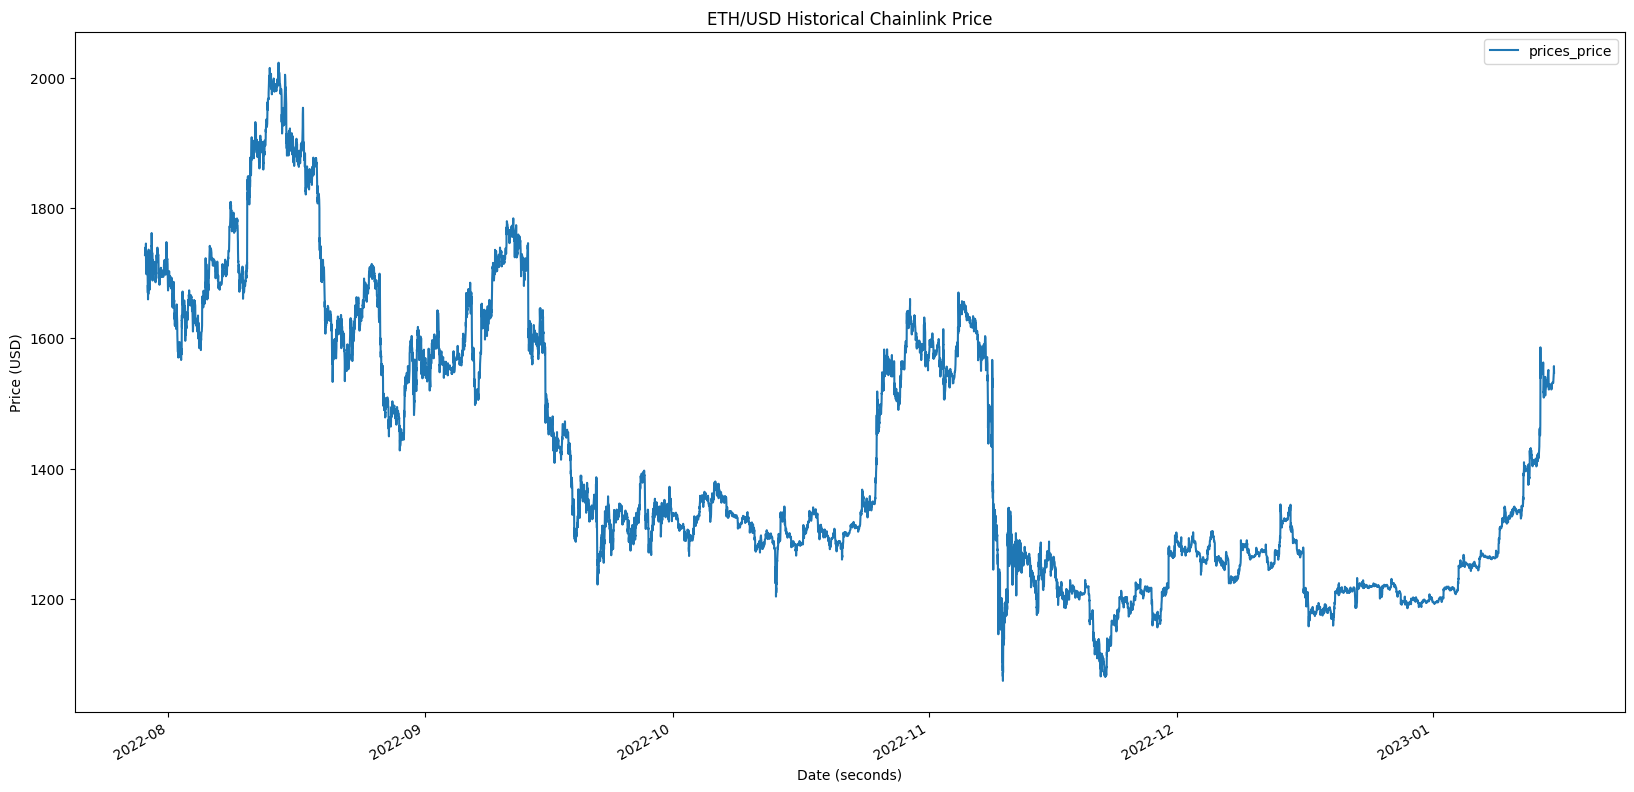

In [24]:
df.plot(x='prices_timestamp', y='prices_price', figsize=(20,10))
plt.xlabel('Date (seconds)')
plt.ylabel('Price (USD)')
plt.title('ETH/USD Historical Chainlink Price')